In [1]:
#Librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
#https://www.kaggle.com/datasets/masterdatasan/lung-cancer-mortality-datasets-v2

In [3]:
df = pd.read_csv("lung_cancer_mortality_data_large_v2.csv")

In [4]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0


In [5]:
# Mostrar solo tratamiento de Cancer Estado 1 que sobrevivio
df_filt1 = df[(df["cancer_stage"]== "Stage I") & (df["survived"] == 1)]
#df_filt1 = df_filt1[df_filt1["survived"] == 1]

In [6]:
#Aqui se imprime el df filtrado
df_filt1

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
16,17,48.0,Female,Portugal,2020-02-29,Stage I,2020-03-13,No,Passive Smoker,40.1,251,1,1,0,0,Surgery,2021-07-04,1
59,60,54.0,Male,Finland,2014-11-02,Stage I,2014-11-17,No,Former Smoker,39.8,299,1,0,0,0,Radiation,2016-03-18,1
90,91,72.0,Female,Sweden,2021-06-30,Stage I,2021-07-25,No,Former Smoker,35.9,257,0,0,0,0,Chemotherapy,2022-11-18,1
100,101,59.0,Male,Austria,2016-09-13,Stage I,2016-09-19,Yes,Former Smoker,45.0,244,1,0,0,0,Chemotherapy,2018-05-18,1
134,135,70.0,Male,Latvia,2022-04-27,Stage I,2022-05-03,Yes,Never Smoked,19.6,192,1,1,1,0,Radiation,2023-07-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249881,3249882,67.0,Male,Italy,2015-03-22,Stage I,2015-04-16,Yes,Passive Smoker,41.3,267,1,1,0,0,Surgery,2016-08-16,1
3249887,3249888,59.0,Male,Croatia,2022-12-06,Stage I,2022-12-22,Yes,Current Smoker,25.8,160,1,0,0,0,Radiation,2024-02-03,1
3249889,3249890,70.0,Male,Greece,2016-04-16,Stage I,2016-04-25,Yes,Former Smoker,37.4,288,1,1,0,0,Chemotherapy,2017-03-14,1
3249921,3249922,43.0,Male,Poland,2024-03-08,Stage I,2024-03-12,No,Passive Smoker,28.0,217,1,1,1,0,Combined,2025-12-07,1


In [7]:
df_agrupado_tratamiento = df.groupby('treatment_type').size().reset_index(name='count')

In [8]:
df_agrupado_tratamiento

,treatment_type,count
0,Chemotherapy,812702
1,Combined,811555
2,Radiation,812263
3,Surgery,813480


In [9]:
#convertir fechas a date time
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

In [10]:
#Tambien las edades a Int por que medio al dope que sean floats
df['age'] = df['age'].astype("int")

In [11]:
df['cholesterol_bmi_ratio'] = df['cholesterol_level'] / df['bmi']

In [12]:
def categorizar_bmi(bmi):
    if bmi < 18.5:
        return("Underweight")
    elif bmi < 24.9:
        return("Normal Weight")
    elif bmi < 29.9:
        return("Overweight")
    elif bmi >= 30:
        return("Obese")

In [13]:
df["bmi_categorized"] = df["bmi"].apply(categorizar_bmi)

In [14]:
# Creo que el tema de la limpieza ya estaria

<Axes: xlabel='gender', ylabel='Count'>

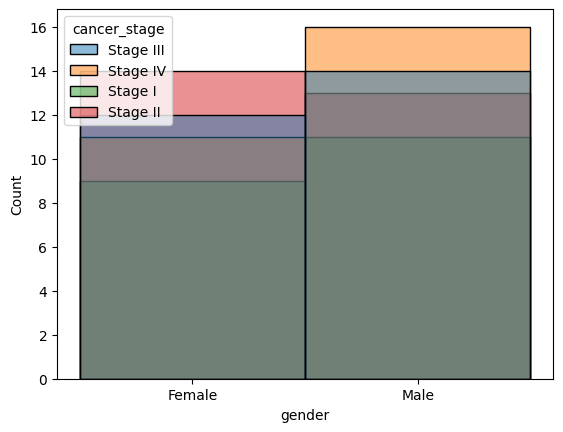

In [15]:
sns.histplot(df.head(100), x="gender", hue="cancer_stage")

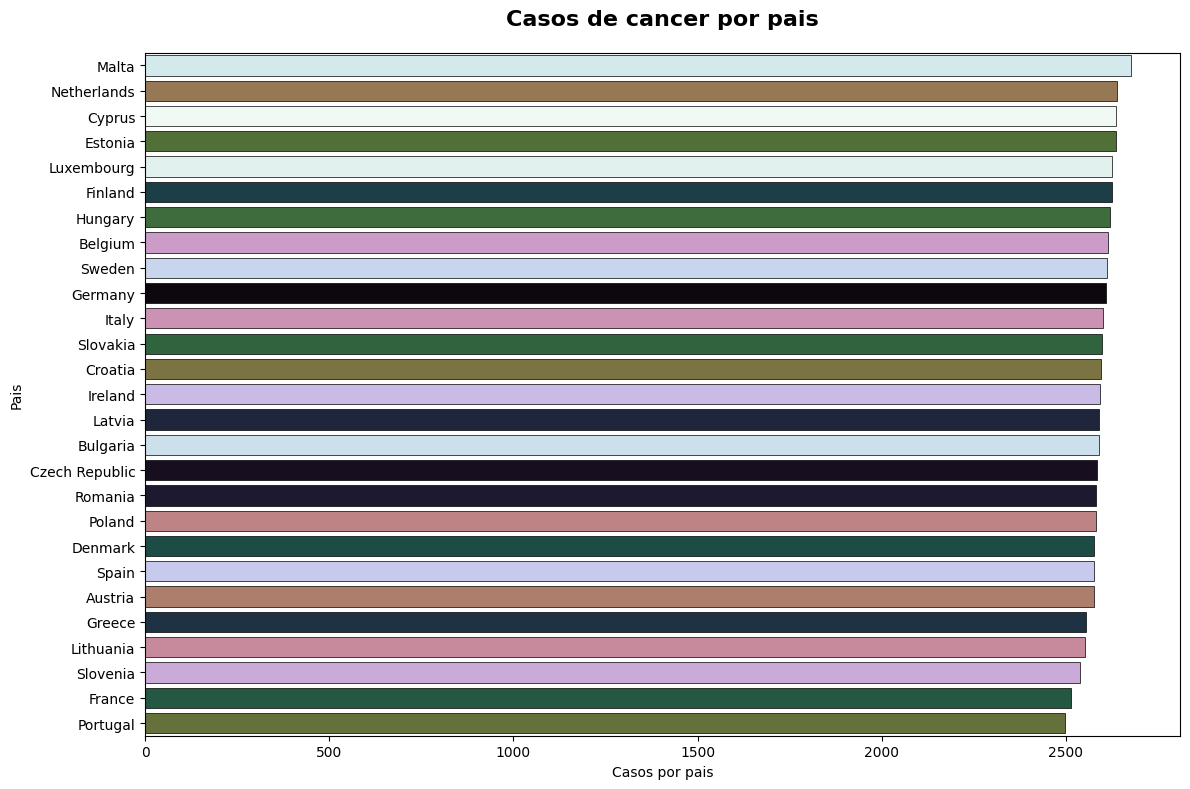

In [16]:
#Barplot con casos de cancer por pais

n = 70000

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df.head(n), 
              y='country',
              ax=ax,
              order=df.head(n)['country'].value_counts().index,
              palette='cubehelix',
              edgecolor='black',
              linewidth=0.5,
              legend=False,
              hue='country',
              )

ax.set_ylabel("Pais")
ax.set_xlabel("Casos por pais")
ax.set_title('Casos de cancer por pais', 
             fontsize=16, 
             fontweight='bold',
             pad=20)
plt.tight_layout()
plt.savefig("casos_de_cancer_por_pais.png")
plt.show()




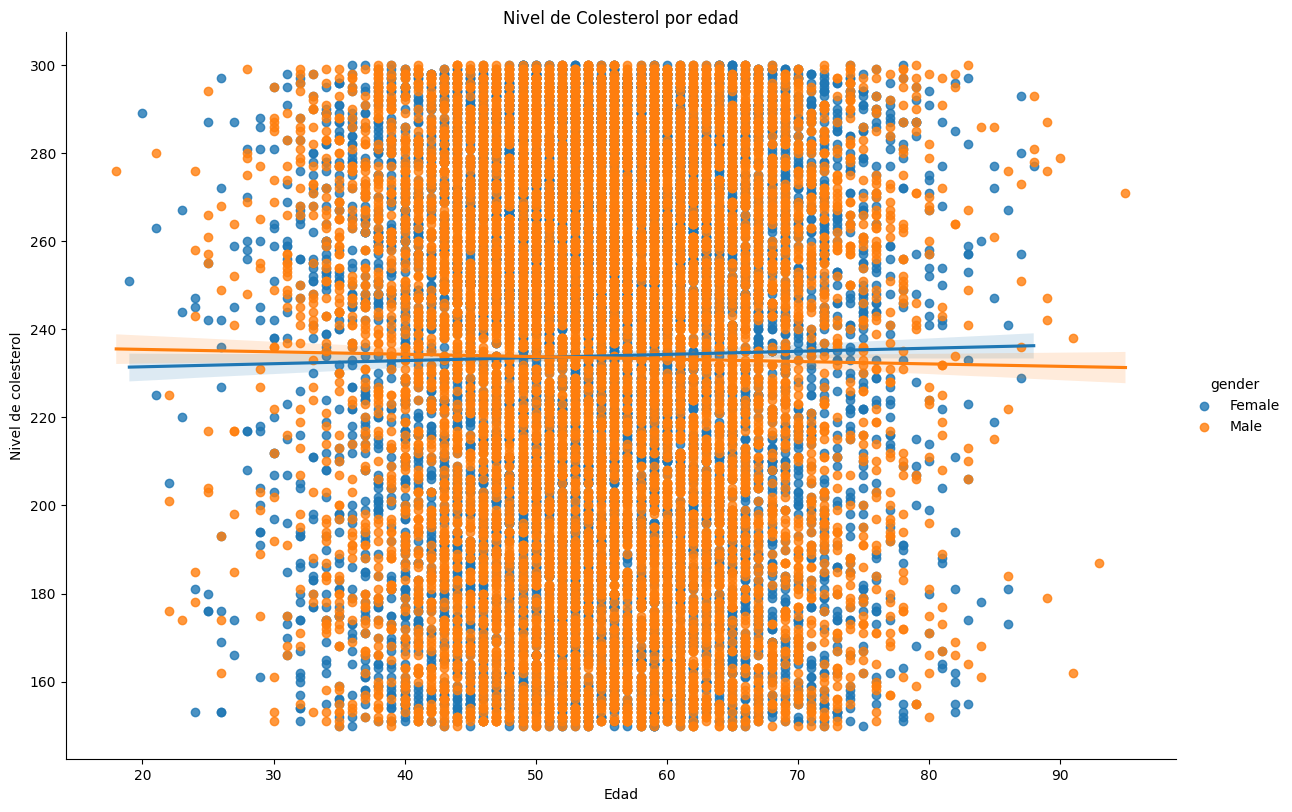

In [38]:
# Lmplot plot de...
g = sns.lmplot(data=df.head(20000), 
               x='age', 
               y='cholesterol_level',
               height=8,  # altura en pulgadas
               aspect=1.5,
               hue="gender").set(title="Nivel de Colesterol por edad")  # ancho = height * aspect

g.set_xlabels("Edad")
g.set_ylabels("Nivel de colesterol")
g.set


# Exportar
g.savefig('colesterol_vs_edad.png') 


In [18]:
# estimador condicional de Kernel por hypertension	asthma	cirrhosis

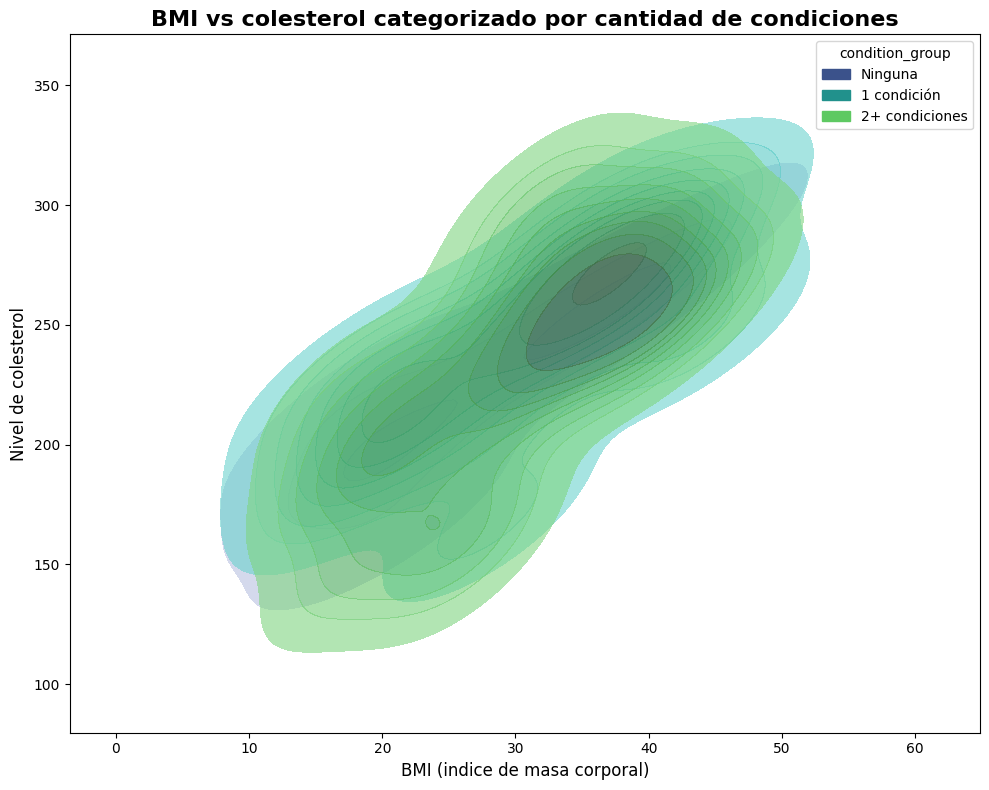

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))

df_plot = df.head(100)
df_plot['condition_count'] = df_plot[['hypertension', 'asthma', 'cirrhosis']].sum(axis=1)
df_plot['condition_group'] = pd.cut(df_plot['condition_count'], 
                                     bins=[-1, 0, 1, 3], 
                                     labels=['Ninguna', '1 condición', '2+ condiciones'])

sns.kdeplot(data=df_plot, 
            x='bmi', 
            y='cholesterol_level',
            hue='condition_group',
            palette='viridis',
            alpha=0.6,
            thresh=0.05,
            ax=ax,
            fill=True)

ax.set_title('BMI vs colesterol categorizado por cantidad de condiciones', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('BMI (indice de masa corporal)', fontsize=12)
ax.set_ylabel('Nivel de colesterol', fontsize=12)
plt.tight_layout()
plt.savefig("BMI_vs_colesterol_por_condiciones_medicas.png")
plt.show()

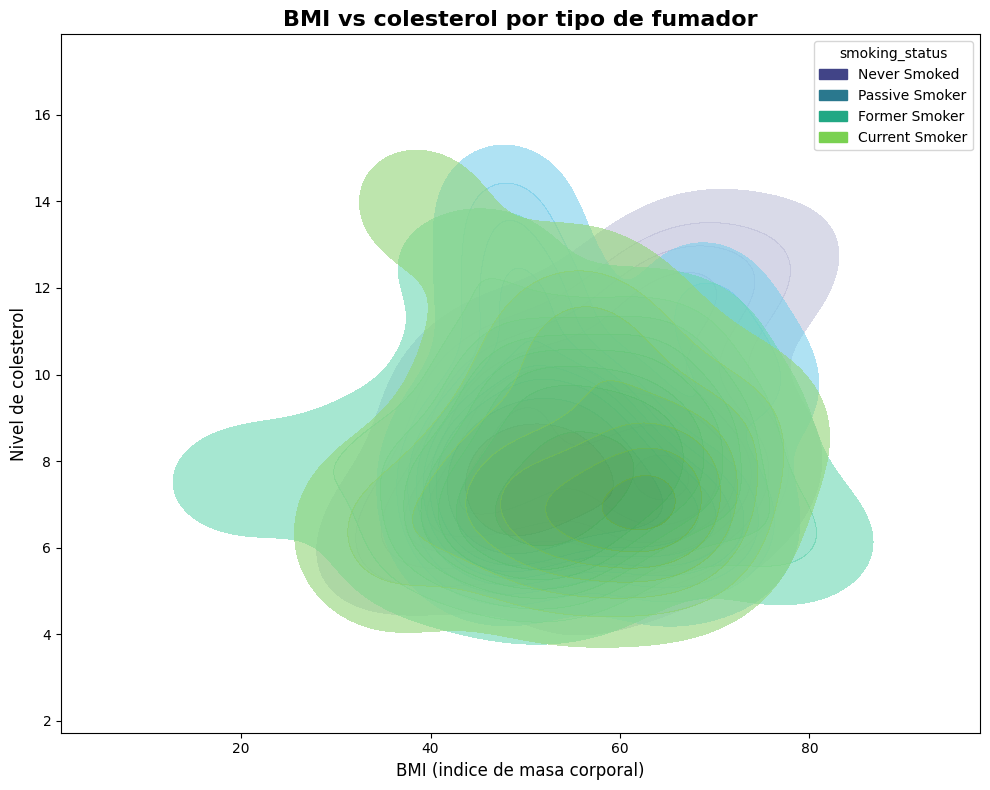

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))

# Crear una columna categórica combinada

sns.kdeplot(data=df.head(100), 
            x='age', 
            y='cholesterol_bmi_ratio',
            hue='smoking_status',
            palette='viridis',
            alpha=0.6,
            thresh=0.05,
            ax=ax,
            fill=True)

ax.set_title('BMI vs colesterol por tipo de fumador', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('BMI (indice de masa corporal)', fontsize=12)
ax.set_ylabel('Nivel de colesterol', fontsize=12)
plt.tight_layout()
plt.savefig("BMI_vs_colesterol_por_fumador.png")
plt.show()


In [21]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,cholesterol_bmi_ratio,bmi_categorized
0,1,64,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0,8.263666,Obese
1,2,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0,8.030888,Overweight
2,3,65,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0,10.211640,Normal Weight
3,4,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1,7.196532,Obese
4,5,37,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0,6.517413,Obese


In [22]:
features = ['age', 'bmi', 'smoking_status', 'gender', 'cancer_stage', 
            'hypertension', 'asthma', 'cirrhosis', 'survived']
target = 'cholesterol_level'
df_rl = pd.DataFrame.copy(df)

In [23]:
X = df_rl[features]        #variable independendiente
y = df_rl[target]          #variable denpendiente

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Identificar columnas numéricas y categóricas
numeric_features = ['age', 'bmi']
categorical_features = ['smoking_status', 'gender', 'cancer_stage']

# Crear preprocesadores
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [27]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [28]:
# entrenamiento
pipeline.fit(x_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformer

In [29]:
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

train_r2 = r2_score(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)

In [30]:
test_r2 = r2_score(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)

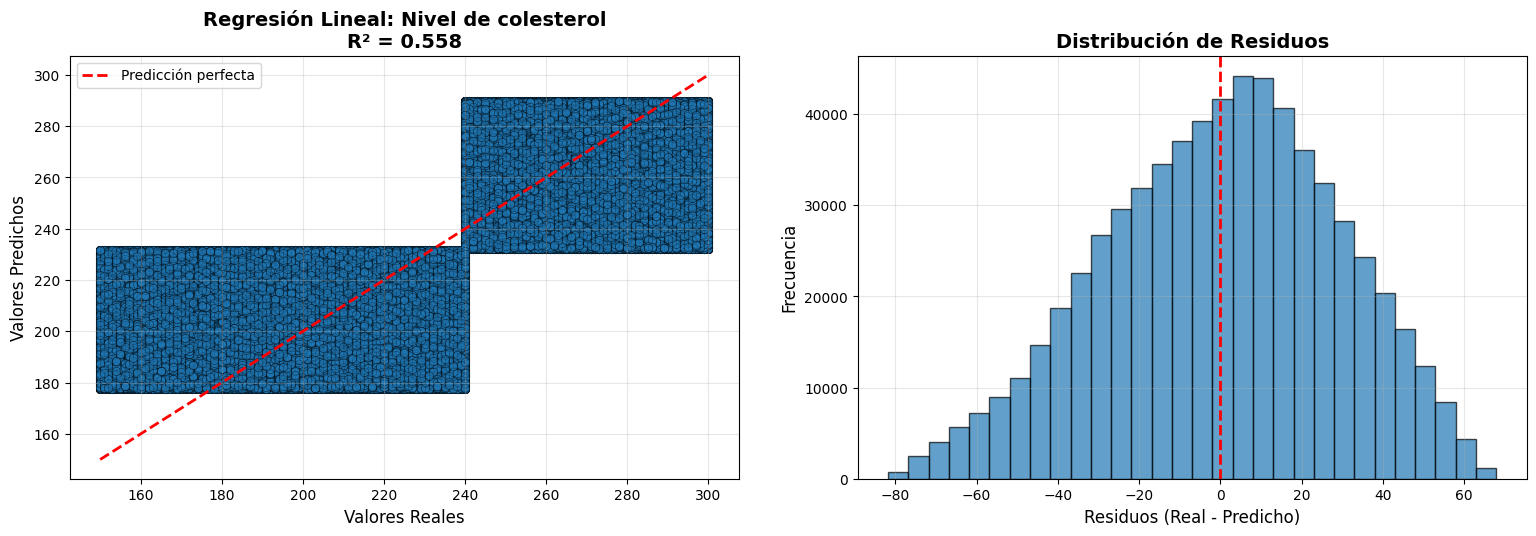

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Valores reales vs predichos (prueba)
axes[0].scatter(y_test, y_pred_test, alpha=0.5, edgecolors='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Predicción perfecta')
axes[0].set_xlabel('Valores Reales', fontsize=12)
axes[0].set_ylabel('Valores Predichos', fontsize=12)
axes[0].set_title(f'Regresión Lineal: Nivel de colesterol\nR² = {test_r2:.3f}', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Distribución de residuos
residuos = (y_test - y_pred_test)
axes[1].hist(residuos, bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuos (Real - Predicho)', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].set_title('Distribución de Residuos', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout(pad=3.0)
plt.savefig('regresion_lineal_resultados.png', dpi=300, bbox_inches='tight')
plt.show()



In [39]:
train_r2

0.5581481564166939